# Steps

* Data exploration & visualization 
* splitting data
* Decision tree model
* Cross validation
* Classification_report
* Random forest model
* Cross validation (not sure)
* Confusion matrix
* Classification_report
* PCA
* gridsearchCV
* Decision tree model
* Cross validation
* Confusion matrix
* Classification_report
* Random forest model
* Cross validation
* Confusion matrix
* Classification_report
* Do the write-up analysis and conclusions.

In [1]:
# Import data science environment.
import math
import warnings

from IPython.display import display
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import statsmodels.formula.api as smf

from sklearn import ensemble, tree
from sklearn.model_selection import cross_val_score


# Display preferences
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# ignore harmless error.
warnings.filterwarnings(
    action='ignore',
    module='scipy',
    message='^internal gelsd'
)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Train_UWu5bXk.csv")

### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.920,Regular,0.019,Soft Drinks,48.269,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.500,Low Fat,0.017,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270
3,FDX07,19.200,Regular,0.000,Fruits and Vegetables,182.095,OUT010,1998,NaN,Tier 3,Grocery Store,732.380
4,NCD19,8.930,Low Fat,0.000,Household,53.861,OUT013,1987,High,Tier 3,Supermarket Type1,994.705


In [5]:
categorical = df.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

Item_Identifier
1559
Item_Fat_Content
5
Item_Type
16
Outlet_Identifier
10
Outlet_Size
3
Outlet_Location_Type
3
Outlet_Type
4


### We can drop the item identifier column, as it not really important to predict the Item Type.

In [6]:
# Drop other columns with many unique variables and those that don't make sense to be in the model
df.drop(['Outlet_Identifier'], 1, inplace=True)

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Item_Weight

In [8]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace = True)

In [9]:
decimals = 2    
df['Item_Weight'] = df['Item_Weight'].apply(lambda x: round(x, decimals))

In [10]:
df["Item_Weight"].unique()

array([ 9.3 ,  5.92, 17.5 , 19.2 ,  8.93, 10.39, 13.65, 12.86, 16.2 ,
       11.8 , 18.5 , 15.1 , 17.6 , 16.35,  9.  , 13.35, 18.85, 14.6 ,
       13.85, 13.  ,  7.64, 11.65, 19.25, 18.6 , 18.7 , 17.85, 10.  ,
        8.85,  9.8 , 13.6 , 21.35, 12.15,  6.42, 19.6 , 15.85,  7.39,
       10.2 ,  9.89, 10.89,  7.91,  9.2 ,  8.37,  7.97, 17.7 , 19.35,
        8.64, 15.6 , 18.25,  7.86,  7.83,  8.39, 12.85, 19.  ,  5.91,
        7.76, 16.75, 15.5 ,  6.05,  6.3 , 20.85, 20.75,  8.89, 19.7 ,
        8.75, 13.3 ,  8.31, 19.75, 17.1 , 10.5 ,  6.63, 14.15,  9.1 ,
        7.5 , 16.85,  7.49, 11.6 , 12.65, 20.25,  8.6 , 12.6 ,  8.88,
       20.5 , 13.5 ,  7.24,  6.92,  8.02, 12.8 , 16.6 , 14.  , 16.  ,
       21.25,  7.37, 18.35,  5.46,  7.27,  6.16, 19.5 , 15.2 , 14.5 ,
       13.1 , 12.3 , 11.1 , 11.3 ,  5.75, 11.35,  6.53, 10.3 ,  5.78,
       11.85, 18.75,  5.26, 16.1 ,  9.5 , 13.8 , 14.65,  6.67,  6.11,
       17.2 ,  6.32,  4.88,  5.42, 14.1 ,  7.55, 17.25, 12.  , 10.1 ,
        7.79, 13.15,

### Outlet_Size

In [11]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
df["Outlet_Size"] = df["Outlet_Size"].astype(str)

In [13]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Outlet_Size'] = LE.fit_transform(df['Outlet_Size'])

df['Outlet_Size'].unique()

array([1, 3, 0, 2])

In [14]:
df.Outlet_Size = pd.to_numeric(df["Outlet_Size"], errors='coerce')

### Item_Fat_Content

In [15]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

### Outlet_Location_Type

In [16]:
df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [17]:
LE = LabelEncoder()
df['Outlet_Location_Type'] = LE.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Location_Type'].unique()

array([0, 2, 1])

### Outlet_Type

In [18]:
df.Outlet_Type.unique

<bound method Series.unique of 0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object>

In [19]:
df['Outlet_Type'] = LE.fit_transform(df['Outlet_Type'])

df['Outlet_Type'].unique()

array([1, 2, 0, 3])

In [20]:
df.Outlet_Type.unique()

array([1, 2, 0, 3])

### Establishment Year

In [21]:
df.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [22]:
df["Outlet_Establishment_Year"] = pd.get_dummies(df["Outlet_Establishment_Year"])

In [23]:
df.Outlet_Establishment_Year = pd.to_numeric(df["Outlet_Establishment_Year"], errors='coerce')

## Item_Identifier

In [24]:
df.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [25]:
df["Item_Identifier"] = pd.get_dummies(df["Item_Identifier"])

In [26]:
df.Item_Identifier = pd.to_numeric(df["Item_Identifier"], errors='coerce')

## Item_MRP

In [27]:
 ## Let's round the values
decimals = 2    
df['Item_MRP'] = df['Item_MRP'].apply(lambda x: round(x, decimals))
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].apply(lambda x: round(x, decimals))

### Item_Type

In [28]:
df['Item_Type'] = LE.fit_transform(df['Item_Type'])

df['Item_Type'].unique()



array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

## Visualization

In [29]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

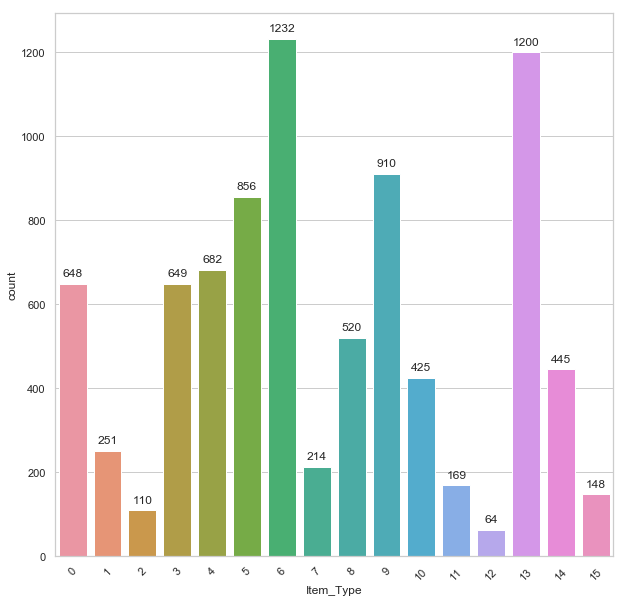

In [30]:
plt.figure(figsize = (10,10))
df['Item_Type'].value_counts()

import seaborn as sns

sns.set(style="whitegrid")
splot = sns.countplot(x="Item_Type",data=df[['Item_Type']])
plt.xticks(rotation = 45)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

<Figure size 720x720 with 0 Axes>

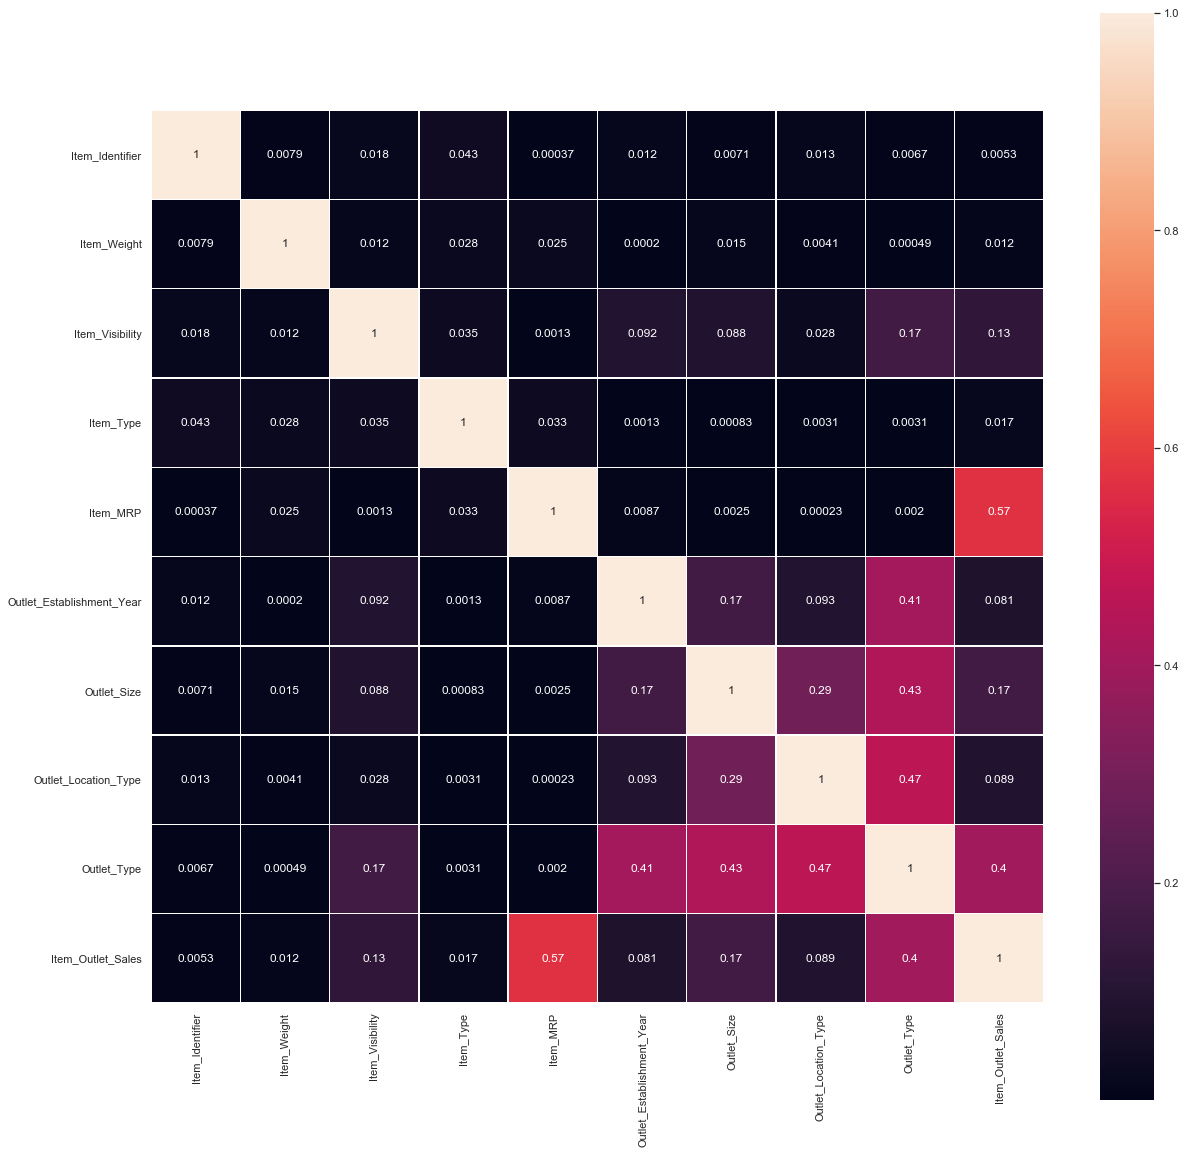

In [31]:
plt.figure(figsize=(10, 10))

corr_matrix = np.abs(df.corr())
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5)
plt.show()

### We can see that the top correlated variables are Item_Outlet_Sales, Outlet_Size, Outlet_Type, Outlet_Location_Type

In [32]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,9.300,Low Fat,0.016,4,249.810,0,1,0,1,3735.140
1,0,5.920,Regular,0.019,14,48.270,0,1,2,2,443.420
2,0,17.500,Low Fat,0.017,10,141.620,0,1,0,1,2097.270
3,0,19.200,Regular,0.000,6,182.090,0,3,2,0,732.380
4,0,8.930,Low Fat,0.000,9,53.860,0,0,2,1,994.710
5,0,10.390,Regular,0.000,0,51.400,0,1,2,2,556.610
6,0,13.650,Regular,0.013,13,57.660,0,0,2,1,343.550
7,0,12.860,Low Fat,0.127,13,107.760,1,1,2,3,4022.760
8,0,16.200,Regular,0.017,5,96.970,0,3,1,1,1076.600
9,0,19.200,Regular,0.094,5,187.820,0,3,1,1,4710.530


# Splitting

### For this model, as mentioned above, we will be taking item type (the Item_Fat_Content) for modeling.

In [33]:
from datetime import datetime
start_time = datetime.now()

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.model_selection import cross_val_score



df["int_MRP_type"] = df["Item_MRP"] + df["Item_Outlet_Sales"]

rfc = ensemble.RandomForestClassifier(24)


X = df.drop('Item_Fat_Content', 1)
Y = df.Item_Fat_Content
X_train, X_test, y_train, y_test = train_test_split(df.drop('Item_Fat_Content', 1),df.Item_Fat_Content, test_size = 0.30)

rfc.fit(X,Y)

cross_val_score(rfc, X, Y, cv=10)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:03.209126


In [34]:
cross_val_score(rfc, X, Y, cv=10)

array([0.735363  , 0.75409836, 0.76084408, 0.75381008, 0.74443142,
       0.76553341, 0.73356808, 0.77085781, 0.76968273, 0.75618375])

In [35]:

#df['Item_Fat_Content'] = pd.get_dummies(df['Item_Fat_Content'])

#df['Item_Fat_Content'].unique()

In [36]:
start_time = datetime.now()

from sklearn.tree import DecisionTreeClassifier

X = df.drop('Item_Fat_Content', 1)
Y = df.Item_Fat_Content
X_train, X_test, y_train, y_test = train_test_split(df.drop('Item_Fat_Content', 1),df.Item_Fat_Content, test_size = 0.30)


clf = tree.DecisionTreeClassifier()
clf.fit(X, Y)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
# cross_val_score(tree, X, Y, cv=10)

Duration: 0:00:00.064049


In [37]:
cross_val_score(clf, X, Y, cv=10)

array([0.74355972, 0.77166276, 0.77725674, 0.77022274, 0.73974209,
       0.74794842, 0.75234742, 0.78143361, 0.73678026, 0.75618375])

In [38]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
# Instantiate and fit our model.
rfc = ensemble.RandomForestClassifier()

X_nor = StandardScaler().fit_transform(X)

for i in range(1,11):
    sklearn_pca = PCA(n_components=i)
    X_pca = sklearn_pca.fit_transform(X_nor)
    score = cross_val_score(rfc, X_pca, Y, cv=10)
    print("components count=%s, RFC: Input X--> Accuracy: %0.3f (+/- %0.3f)" % (i, score.mean(), score.std() * 2))

components count=1, RFC: Input X--> Accuracy: 0.469 (+/- 0.039)
components count=2, RFC: Input X--> Accuracy: 0.520 (+/- 0.042)
components count=3, RFC: Input X--> Accuracy: 0.554 (+/- 0.019)
components count=4, RFC: Input X--> Accuracy: 0.582 (+/- 0.027)
components count=5, RFC: Input X--> Accuracy: 0.629 (+/- 0.028)
components count=6, RFC: Input X--> Accuracy: 0.651 (+/- 0.038)
components count=7, RFC: Input X--> Accuracy: 0.639 (+/- 0.026)
components count=8, RFC: Input X--> Accuracy: 0.620 (+/- 0.018)
components count=9, RFC: Input X--> Accuracy: 0.623 (+/- 0.026)
components count=10, RFC: Input X--> Accuracy: 0.626 (+/- 0.019)


## The best accuracy can be found in component count 10 with 0.623.